In [1]:
import importlib
import pandas as pd
import xarray as xr
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt

from ecpaper_utils import fig_utils as ecfig
from ecpaper_utils import bootstrap_utils as boot

importlib.reload(ecfig)

warnings.filterwarnings('ignore')

In [2]:
cmip5models = pd.read_csv("../DATASORT/cmip5csvinfo.csv")
cmip6models = pd.read_csv("../DATASORT/cmip6csvinfo.csv")

In [3]:
center5=cmip5models['Center']
center5set = set(center5)
center6=cmip6models['Center']
center6set = set(center6)

In [4]:
cmip5jlats="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatcmip5.nc"
cmip6jlats="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatcmip6.nc"
obs="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatobs.nc"

In [5]:
jlat5=xr.open_dataset(cmip5jlats)
jlat6=xr.open_dataset(cmip6jlats)
obsdata = xr.open_dataset(obs)
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

In [6]:
jlat5p = jlat5['jlatemp'].assign_coords(model=np.array(center5))
jlat5pm = jlat5p.groupby(jlat5p.model).mean()
jlat5f = jlat5['jlatemf'].assign_coords(model=np.array(center5))
jlat5fm = jlat5f.groupby(jlat5f.model).mean()

r5 = xr.corr(jlat5pm, jlat5fm-jlat5pm)
minr5, maxr5 = boot.boot_corr_ci(jlat5pm, jlat5fm-jlat5pm, 95)

jlat6p = jlat6['jlatemp'].assign_coords(model=np.array(center6))
jlat6pm = jlat6p.groupby(jlat6p.model).mean()
jlat6f = jlat6['jlatemf'].assign_coords(model=np.array(center6))
jlat6fm = jlat6f.groupby(jlat6f.model).mean()

r6 = xr.corr(jlat6pm, jlat6fm-jlat6pm)
minr6, maxr6 = boot.boot_corr_ci(jlat6pm, jlat6fm-jlat6pm, 95)

In [7]:
print(minr6)
print(maxr6)
print(r6)

-0.8077977349457208
-0.1869456879920515
<xarray.DataArray ()>
array(-0.57407988)


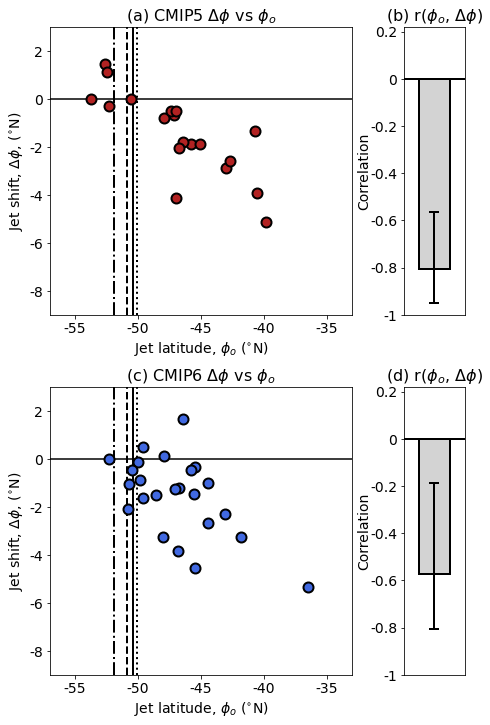

In [8]:
fig = plt.figure()
w=6 ; h=10
fig.set_size_inches(w, h)
ax1 = fig.add_axes(np.array([0.05,0.55,0.7,0.4]))
ax1 = ecfig.jlatscattersetup(ax1,'(a) CMIP5 $\Delta \phi$ vs $\phi_{o}$')
ax1.plot([-57,-33],[0,0], color="black")
ax1.plot([obsdata["jlatera5"], obsdata["jlatera5"]],[-9,3], color="black", linewidth=2)
ax1.plot([obsdata["jlaterai"], obsdata["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["jlatjra"], obsdata["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["jlatmerra"], obsdata["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
ax1.plot(jlat5pm, jlat5fm-jlat5pm,"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax2 = fig.add_axes(np.array([0.87,0.55,0.14,0.4]))
ax2.bar(1, r5, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax2.set_xlim(0,2)
ax2.set_ylim(-1,0.22)
ax2.plot([0,2],[0,0], color='black', linewidth=2)
ax2.set_xticks([])
ax2.set_yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2])
ax2.set_yticklabels(['-1','-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax2.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax2.errorbar(1, r5, [[r5-minr5], [maxr5-r5]], color='black', linewidth=2, capsize=5, capthick=2)
ax2.set_title('(b) r($\phi_{o}$, $\Delta \phi$)', fontsize=16)

ax3 = fig.add_axes(np.array([0.05,0.05,0.7,0.4]))
ax3 = ecfig.jlatscattersetup(ax3,'(c) CMIP6 $\Delta \phi$ vs $\phi_{o}$')
ax3.plot([-57,-33],[0,0], color="black")
ax3.plot([obsdata["jlatera5"], obsdata["jlatera5"]],[-9,3], color="black", linewidth=2)
ax3.plot([obsdata["jlaterai"], obsdata["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
ax3.plot([obsdata["jlatjra"], obsdata["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
ax3.plot([obsdata["jlatmerra"], obsdata["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
ax3.plot(jlat6pm, jlat6fm-jlat6pm,"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax4 = fig.add_axes(np.array([0.87,0.05,0.14,0.4]))
ax4.bar(1, r6, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax4.set_xlim(0,2)
ax4.set_ylim(-1,0.22)
ax4.plot([0,2],[0,0], color='black', linewidth=2)
ax4.set_xticks([])
ax4.set_yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2])
ax4.set_yticklabels(['-1','-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax4.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax4.errorbar(1, r6, [[r6-minr6], [maxr6-r6]], color='black', linewidth=2, capsize=5, capthick=2)
ax4.set_title('(d) r($\phi_{o}$, $\Delta \phi$)', fontsize=16)

fig.savefig('figs1.pdf', facecolor='white', bbox_inches='tight')